In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

Supongamos que nos dan esta serie de puntos

In [2]:
N_SAMPLES = 20
x = np.linspace(0,1,num=N_SAMPLES).reshape(-1,1)
t =  4 * x+ np.sin(x*6)+ 0.5*np.random.randn(N_SAMPLES,1)

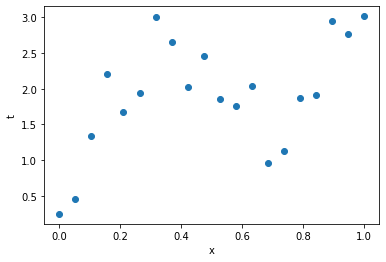

In [3]:
plt.scatter(x,t)
plt.xlabel('x')
plt.ylabel('t')
plt.show()

Por supuesto, antes de seguir dividimos en entrenamiento y testeo

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test = train_test_split(x, t, random_state=42)


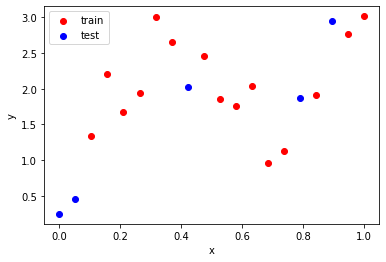

In [5]:
plt.scatter(x_train,t_train, c='red', label='train')
plt.scatter(x_test,t_test, c='blue', label='test')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Como vimos, la idea de Regresion Lineal es modelar

$$y(x,w)=w_{0}+w_{1}x$$

De manera tal que 

$$t\sim \mathcal{N}(y(x,w),\sigma^{2})$$

Con alguna incerteza que no nos importa demasiado hoy.

Aca tenemos la gran ventaja de que sabemos la verdadera funcion que sigue el target. En la vida real, casi nunca sabemos la verdadera funcion.

In [6]:
def y_true(x):
  return  4 * x+ np.sin(x*6)

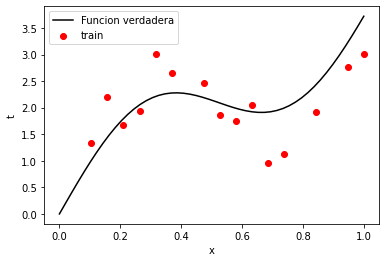

In [7]:
xvals=np.linspace(0,1,num=50).reshape(-1,1)
plt.scatter(x_train,t_train, c='red', label='train')
plt.plot(xvals,y_true(xvals),color='black',label='Funcion verdadera')
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

Veamos los shapes que tenemos

In [8]:
print(x_train.shape,t_train.shape)

(15, 1) (15, 1)


# Regresion Lineal a mano

Si queremos obtener los estimador de maxima verosimilitud de los pesos $w_{0}$, $w_{1}$, tenemos que resolver las ecuaciones normales

$$w_{ML}=(\Phi^{T}\Phi)^{-1}\Phi^{T}t$$

Donde $w_{ML}=(w_{0,ML},w_{1,ML})^{T}$, $t$ el vector de target y $\Phi$ es la matriz de diseño. En cada columna, tiene una de las funciones de base. En este caso, 1 y x. En cada fila, tiene una medicion

Si tenemos M funciones de base y N mediciones, 

$w_{ML}$ es una matriz de $M \text{ x } 1 $

$\Phi$ es una matriz de $N \text{ x } M$

$t$ es una matriz de $N \text{ x } 1$ 

In [9]:
Phi_train=np.vstack([np.ones(len(x_train)),x_train[:,0]]).T # agrupo 1s y xs para cada medicion

Que shape tiene que tener?

In [10]:
Phi_train.shape

(15, 2)

In [12]:
print(x_train[0],Phi_train[0])

[0.26315789] [1.         0.26315789]


Las ecuaciones normales tienen una inversa ahi metida. Eso no es numericamente muy deseable. Conviene resolver la ecuacion

$$(\Phi^{T}\Phi)w_{ML}=\Phi^{T}t$$

y utilizar `np.linalg.solve(A,b)` que obtiene el vector $X$ solucion de la ecuacion

$$Ax=b$$



In [15]:
A=np.dot(Phi_train.T,Phi_train)
b=np.dot(Phi_train.T,t_train)
wML=np.linalg.solve(A,b)

Veamos la solucion

In [16]:
wML

array([[1.85999881],
       [0.36019965]])

Podemos graficar esta solucion facilmente

In [17]:
def y_ML(x,wML):
  return wML[0]+wML[1]*x

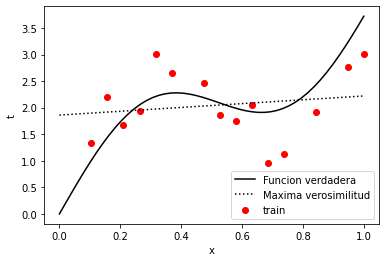

In [18]:
xvals=np.linspace(0,1,num=50).reshape(-1,1)
plt.scatter(x_train,t_train, c='red', label='train')
plt.plot(xvals,y_true(xvals),color='black',label='Funcion verdadera')
plt.plot(xvals,y_ML(xvals,wML),color='black',linestyle='dotted',label='Maxima verosimilitud')
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

Obviamente, no funciona muy bien...

## Ejercicio

Resuelvan las ecuaciones normales, pero ahora modelando la funcion como

$$y(x,w)=w_{0}+\sum_{i=1}^{5}w_{i}x^{i}$$

# Hola `sklearn`!

Como ya vimos antes, `sklearn` resuelve las ecuaciones normales por nosotros utilizando `LinearRegression`

In [19]:
from sklearn.linear_model import LinearRegression

Veamos los parametros que tenemos:

In [20]:
LinearRegression??

La opcion con la que hay que tener mas cuidado ahora mismo en `fit_intercept`. Por defecto, esta como verdadera. 

In [29]:
lr=LinearRegression(fit_intercept=True)
lr.fit(x_train,t_train) #features, target

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Podemos obtener tanto los coeficientes como el intercept

In [30]:
print(lr.intercept_,lr.coef_)

[1.85999881] [[0.36019965]]


In [34]:
lr.predict(np.asarray([0.2]).reshape(1,-1))

array([[1.93203874]])

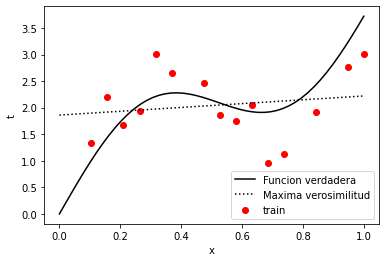

In [35]:
xvals=np.linspace(0,1,num=50).reshape(-1,1)
plt.scatter(x_train,t_train, c='red', label='train')
plt.plot(xvals,y_true(xvals),color='black',label='Funcion verdadera')
plt.plot(xvals,lr.predict(xvals),color='black',linestyle='dotted',label='Maxima verosimilitud')
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

Noten que tenemos 1 solo coeficiente. El $w_{0}$ es el intercept.

Supongamos que no nos damos cuenta y le damos la matriz $\Phi$

In [23]:
lr=LinearRegression(fit_intercept=True)
lr.fit(Phi_train,t_train) #features, target

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
print(lr.intercept_,lr.coef_)

[1.85999881] [[0.         0.36019965]]


Aparece el coeficiente que deberia ser el `intercept` como cero. 

Hay que tener cuidado con esto, en particular cuando queremos aprovechar `sklearn` para hacer regresion polinomial

In [25]:
from sklearn.preprocessing import PolynomialFeatures # utilizo esto para convertir mi X es a la base que quiero

In [26]:
PolynomialFeatures?

In [37]:
PolynomialFeatures(degree=1).fit_transform(x_train)

array([[1.        , 0.26315789],
       [1.        , 0.57894737],
       [1.        , 0.15789474],
       [1.        , 0.94736842],
       [1.        , 0.84210526],
       [1.        , 0.68421053],
       [1.        , 0.10526316],
       [1.        , 0.47368421],
       [1.        , 1.        ],
       [1.        , 0.21052632],
       [1.        , 0.63157895],
       [1.        , 0.36842105],
       [1.        , 0.52631579],
       [1.        , 0.73684211],
       [1.        , 0.31578947]])

In [28]:
PolynomialFeatures(degree=1,include_bias=False).fit_transform(x_train)

array([[0.26315789],
       [0.57894737],
       [0.15789474],
       [0.94736842],
       [0.84210526],
       [0.68421053],
       [0.10526316],
       [0.47368421],
       [1.        ],
       [0.21052632],
       [0.63157895],
       [0.36842105],
       [0.52631579],
       [0.73684211],
       [0.31578947]])

Tenemos dos opciones: `PolynomialFeatures` con `include_bias=True` y `LinearRegression` con `fit_intercept=False` o el opuesto 

Podemos combinar ambos utilizando el `Pipeline`

In [38]:
from sklearn.pipeline import Pipeline
#Pipeline?

In [39]:
degree=3
modelo=Pipeline([['poly',PolynomialFeatures(degree=degree,include_bias=True)],['regressor',LinearRegression(fit_intercept=False)]])

In [40]:
modelo.fit(x_train,t_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ['regressor',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=False)]],
         verbose=False)

In [41]:
modelo.predict(np.asarray([[0.2]]))

array([[2.16401589]])

Podemos ver los coeficientes con

In [42]:
modelo['regressor'].coef_

array([[ -0.54656034,  22.10303536, -48.85686943,  30.53049234]])

Y verificar que no hay intercept

In [43]:
modelo['regressor'].intercept_

0.0

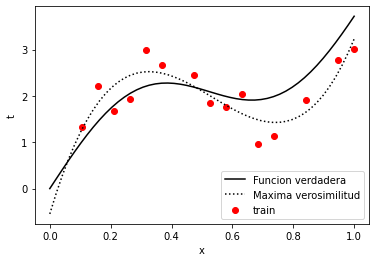

In [44]:
xvals=np.linspace(0,1,num=50).reshape(-1,1)
plt.scatter(x_train,t_train, c='red', label='train')
plt.plot(xvals,y_true(xvals),color='black',label='Funcion verdadera')
plt.plot(xvals,modelo.predict(xvals),color='black',linestyle='dotted',label='Maxima verosimilitud')
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

## Ejercicios:

1.   Utilicen este Pipeline para loopear sobre grados, con que se encuentran?
2.   Utilicen las funciones de base mas adecuadas: [1,x,sin(6x)]. Que encuentra?